TASK NO 1


In [ ]:
backtracking with csp

In [3]:
# Australian Map Coloring using Backtracking CSP

# Variables (Regions)
regions = ['WA', 'NT', 'SA', 'Q', 'NSW', 'V', 'T']

# Domain: 3 colors
colors = ['Red', 'Green', 'Blue']


neighbors = {
    'WA': ['NT', 'SA'],
    'NT': ['WA', 'SA', 'Q'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'Q': ['NT', 'SA', 'NSW'],
    'NSW': ['SA', 'Q', 'V'],
    'V': ['SA', 'NSW'],
    'T': []
}

# CSP Backtracking Algorithm
def is_valid(assignment, region, color):
    for neighbor in neighbors[region]:
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True

def backtrack(assignment):
    # Base Case: All regions are assigned
    if len(assignment) == len(regions):
        return assignment

    # Select unassigned region
    unassigned = [r for r in regions if r not in assignment]
    region = unassigned[0]

    for color in colors:
        if is_valid(assignment, region, color):
            assignment[region] = color
            result = backtrack(assignment)
            if result:
                return result
            # Backtrack
            del assignment[region]

    return None

# Run the algorithm
solution = backtrack({})

# Display result
if solution:
    print("Solution found:")
    for region in regions:
        print(f"{region}: {solution[region]}")
else:
    print("No solution found.")




Solution found:
WA: Red
NT: Green
SA: Blue
Q: Red
NSW: Green
V: Red
T: Red


2ND TASK

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir("/content/drive/My Drive/")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Colab Notebooks',
 'assignmest  first semester q2.docx',
 'K-map (1).pdf',
 'K-map.pdf',
 'Precalculus Lectures  (1).pdf',
 'Precalculus Lectures .pdf',
 'digital-fundamentals-by-thomas-l.-floyd-8th-edition.pdf',
 'ViewRoomInfo.class',
 'NOW MAKE HE CORRECTED BALANCE SHEET FOR M BUSSINE....gsheet',
 'iris.csv',
 'Metric (PKR),Year 1,Percent,Year 2,.txt',
 'balance sheet.txt',
 'application of funds.txt',
 'RWNT WAS 50 K TO 60 K.gsheet',
 'do 2 (1).gsheet',
 'Export it into sheets.gdoc',
 'Untitled spreadsheet (2).gsheet',
 'Untitled spreadsheet (1).gsheet',
 'Untitled spreadsheet.gsheet',
 'do 2.gsheet',
 '.ipynb_checkpoints',
 'Social_Network_Ads.csv',
 'SWaT_Dataset_Attack_v0.xlsx']

In [6]:
import os

# Check if the file exists
file_path = "/content/drive/My Drive/SWaT_Dataset_Attack_v0.xlsx"
print(os.path.exists(file_path))  # This should return True




True


In [12]:
from google.colab import files
uploaded = files.upload()


Saving SWaT_MiniDataset.csv to SWaT_MiniDataset.csv


In [13]:
import pandas as pd

df = pd.read_csv("SWaT_MiniDataset.csv")
df.head()


,FIT101,LIT101,MV101,P101,P102,AIT202,Normal/Attack
0,4.753198,543.741105,1,31.024124,31.238221,7.253380,Normal
1,7.482920,613.654868,1,56.989633,44.085865,6.782428,Attack
2,1.001029,657.188308,0,35.479569,35.858508,6.868577,Normal
3,3.720993,587.382938,1,39.715235,45.120929,6.792727,Normal
4,2.320803,803.547081,1,30.177524,32.025292,6.913691,Attack


Exploratory Data Analysis (EDA)

(500, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FIT101         500 non-null    float64
 1   LIT101         500 non-null    float64
 2   MV101          500 non-null    int64  
 3   P101           500 non-null    float64
 4   P102           500 non-null    float64
 5   AIT202         500 non-null    float64
 6   Normal/Attack  500 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB
None
Missing values per column:
FIT101           0
LIT101           0
MV101            0
P101             0
P102             0
AIT202           0
Normal/Attack    0
dtype: int64
           FIT101      LIT101       MV101        P101        P102      AIT202
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000
mean     5.574494  746.466039    0.484000   40.753324   39.951177    6.987741
std      2.67144

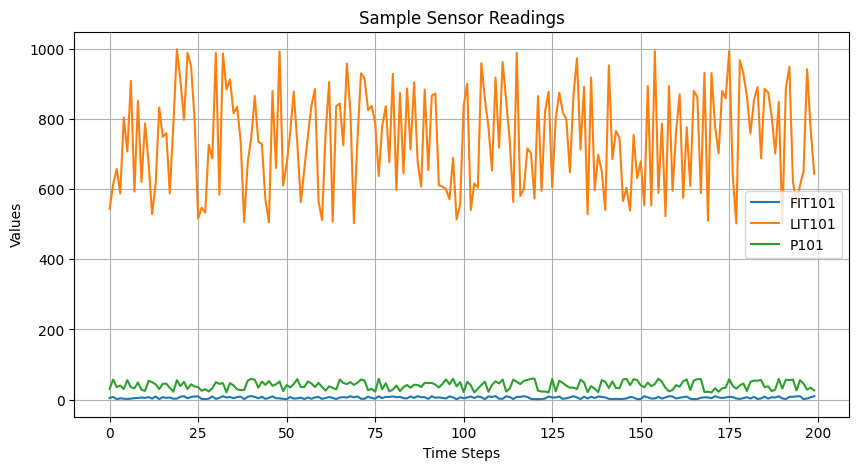

In [14]:
# Basic info
print(df.shape)
print(df.info())

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Statistical summary
print(df.describe())

# Plot a few sensors
import matplotlib.pyplot as plt

df[['FIT101', 'LIT101', 'P101']].head(200).plot(figsize=(10, 5))
plt.title("Sample Sensor Readings")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.grid(True)
plt.show()


 Preprocessing

In [15]:
# Convert 'Normal/Attack' to 0 and 1
df['Label'] = df['Normal/Attack'].map({'Normal': 0, 'Attack': 1})
df.drop('Normal/Attack', axis=1, inplace=True)


Normalize Features

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and label
features = df.drop('Label', axis=1)
labels = df['Label']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)


Train a KNN Model and Evaluate

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.75
Precision: 0.1
Recall: 0.058823529411764705
F1 Score: 0.07407407407407407
Confusion Matrix:
 [[74  9]
 [16  1]]


Decision Tree for Comparison

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("\n--- Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))



--- Decision Tree ---
Accuracy: 0.73
Precision: 0.2222222222222222
Recall: 0.23529411764705882
F1 Score: 0.22857142857142856


TASK NO 3

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    mean_squared_error
)

# Separate features and label
X = df.drop('Label', axis=1)
y = df['Label']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(" KNN Model Evaluation:")
print(f"Accuracy         : {accuracy:.4f}")
print(f"Precision        : {precision:.4f}")
print(f"Recall           : {recall:.4f}")
print(f"F1-Score         : {f1:.4f}")
print(f"Mean Squared Err : {mse:.4f}")
print("Confusion Matrix:\n", conf_matrix)


 KNN Model Evaluation:
Accuracy         : 0.7800
Precision        : 0.2727
Recall           : 0.1765
F1-Score         : 0.2143
Mean Squared Err : 0.2200
Confusion Matrix:
 [[75  8]
 [14  3]]


task no 4

 Train a Second Model – Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("\n Decision Tree Model Evaluation:")
print(f"Accuracy         : {accuracy_dt:.4f}")
print(f"Precision        : {precision_dt:.4f}")
print(f"Recall           : {recall_dt:.4f}")
print(f"F1-Score         : {f1_dt:.4f}")
print(f"Mean Squared Err : {mse_dt:.4f}")
print("Confusion Matrix:\n", conf_matrix_dt)



 Decision Tree Model Evaluation:
Accuracy         : 0.7300
Precision        : 0.2222
Recall           : 0.2353
F1-Score         : 0.2286
Mean Squared Err : 0.2700
Confusion Matrix:
 [[69 14]
 [13  4]]
